# ⚽ Análisis de telemetría de partidos de Fútbol con InfluxDB
Este notebook utiliza InfluxDB para realizar consultas de telemetría sobre datos de fútbol

In [5]:
# Importar dependencias

# OS
import os

# InfluxDB Client
from influxdb_client_3 import InfluxDBClient3

# Importar Matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Lectura variables de entorno
INFLUXDB_HOST = os.getenv("INFLUXDB_HOST", "http://influxdb3:8181")
INFLUXDB_DB = os.getenv("INFLUXDB_DB", "telemetry")
OUTPUT_DIR = os.getenv("OUTPUT_DIR", "output")
SPEED_FILE_NAME = os.getenv("SPEED_FILE_NAME", "speed.png")
COMPARATIVE_HEART_RATE_FILE_NAME = os.getenv("COMPARATIVE_HEART_RATE_FILE_NAME", "comparative_heart_rate.png")
SPEED_VS_HEART_RATE_FILE_NAME = os.getenv("SPEED_VS_HEART_RATE_FILE_NAME", "speed_vs_heart_rate.png")

# Imprimir variables de entorno
print ("Variables de entorno:")
print ("\t- INFLUXDB_HOST: ", INFLUXDB_HOST)
print ("\t- INFLUXDB_DB: ", INFLUXDB_DB)
print ("\t- OUTPUT_DIR: ", OUTPUT_DIR)
print ("\t- SPEED_FILE_NAME: ", SPEED_FILE_NAME)
print ("\t- COMPARATIVE_HEART_RATE_FILE_NAME: ", COMPARATIVE_HEART_RATE_FILE_NAME)
print ("\t- SPEED_VS_HEART_RATE_FILE_NAME: ", SPEED_VS_HEART_RATE_FILE_NAME)

Variables de entorno:
	- INFLUXDB_HOST:  http://influxdb3:8181
	- INFLUXDB_DB:  telemetry
	- OUTPUT_DIR:  output
	- SPEED_FILE_NAME:  speed.csv
	- COMPARATIVE_HEART_RATE_FILE_NAME:  comparative_heart_rate.csv
	- SPEED_VS_HEART_RATE_FILE_NAME:  speed_vs_heart_rate.png


In [ ]:
# Crear carpeta de salida si no existe
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [ ]:
# Configuración de la conexión a InfluxDB
client = InfluxDBClient3(host=INFLUXDB_HOST, database=INFLUXDB_DB)

## 📡 Telémetria de fútbol (football_telemetry.csv)

### Carga inicial

In [ ]:
client.write_file("football_telemetry.csv", tag_columns=["player", "team"], data_format="csv")

### Mostrar la evolución de la velocidad ('speed') de 'Vinicius' a lo largo del tiempo

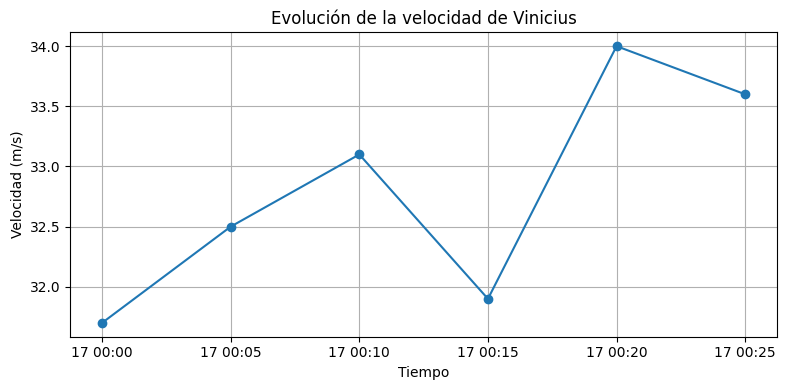

In [ ]:
query = """
SELECT time, speed
FROM player_stats
WHERE player = 'Vinicius'
ORDER BY time ASC
"""

df = client.query(query).to_pandas()

plt.figure(figsize=(8, 4))
plt.plot(df["time"], df["speed"], marker="o")
plt.title("Evolución de la velocidad de Vinicius")
plt.xlabel("Tiempo")
plt.ylabel("Velocidad (m/s)")
plt.grid(True)
plt.tight_layout()

# Guardar el gráfico como PNG
plt.savefig(OUTPUT_DIR + "/" + SPEED_FILE_NAME, dpi=300, bbox_inches="tight")

# Mostrar el gráfico
plt.show()

### Mostrar la comparativa de ritmo cardíaco ('heart_rate') entre 'Vinicius', 'Pedri' y 'Bellingham' a lo largo del tiempo

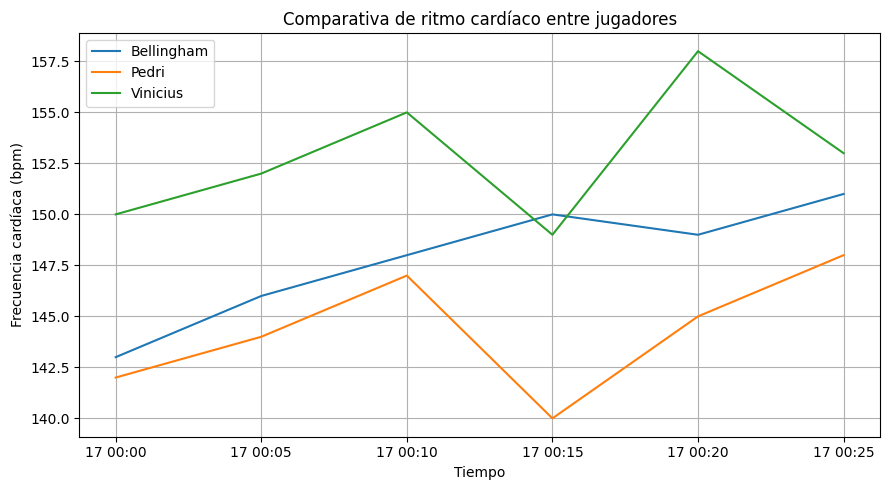

In [ ]:
query = """
SELECT time, player, heart_rate
FROM player_stats
WHERE player IN ('Vinicius', 'Pedri', 'Bellingham')
ORDER BY time ASC
"""

df = client.query(query).to_pandas()

plt.figure(figsize=(9, 5))
for player, subdf in df.groupby("player"):
    plt.plot(subdf["time"], subdf["heart_rate"], label=player)

plt.title("Comparativa de ritmo cardíaco entre jugadores")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia cardíaca (bpm)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Guardar el gráfico como PNG
plt.savefig(OUTPUT_DIR + "/" + COMPARATIVE_HEART_RATE_FILE_NAME, dpi=300, bbox_inches="tight")

# Mostrar el gráfico
plt.show()

### Mostrar la relación entre la velocidad ('speed') y el pulso cardíaco ('heart_rate') de todos los jugadores

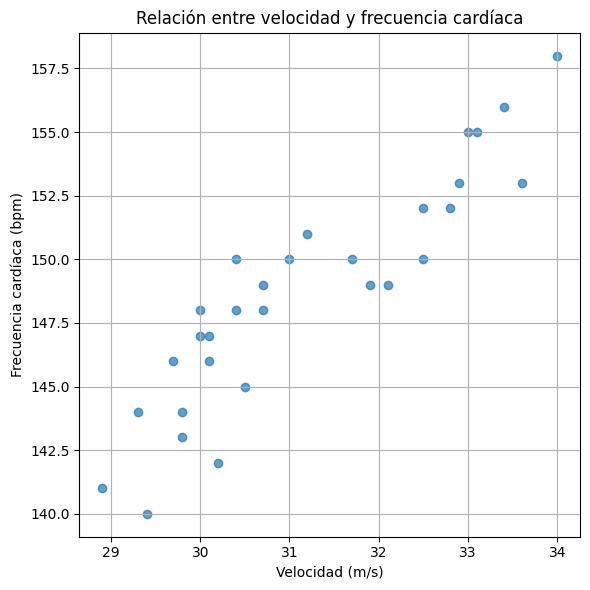

In [ ]:
query = """
SELECT player, speed, heart_rate
FROM player_stats
"""

df = client.query(query).to_pandas()

plt.figure(figsize=(6, 6))
plt.scatter(df["speed"], df["heart_rate"], alpha=0.7)

plt.title("Relación entre velocidad y frecuencia cardíaca")
plt.xlabel("Velocidad (m/s)")
plt.ylabel("Frecuencia cardíaca (bpm)")
plt.grid(True)
plt.tight_layout()

# Guardar el gráfico como PNG
plt.savefig(OUTPUT_DIR + "/" + SPEED_VS_HEART_RATE_FILE_NAME, dpi=300, bbox_inches="tight")

# Mostrar el gráfico
plt.show()

### Cerrar conexión con InfluxDB

In [91]:
client.close()